# `hexgrid`

The hexgrid routine is not adaptive but simply creates a grid of hexagonal shaped masks. Hexagons are a natural tiling element. They are the regular polygon with the most number of sides that can uniformly tile an image. As such they are the closest approximation to circular grid.

The pixel values in the infile are not used to create the grid; only the image dimensions.

As sidelen becomes small, there can be some quantization like effects/rough edges. A practical limit of 3 pixel is used.

The xref,yref location basically sets the “phase” of the hexagonal grid. It provides a way to keep the grid from spiting a single feature into multiple adjoining grids.

In [1]:
ciaover 
echo Today is `date`

CIAO 4.11 Wednesday, December  5, 2018
  bindir      : /export/ciao-4.11/bin
  CALDB       : 4.8.2
Today is Wed Jan 23 08:28:25 EST 2019


In [2]:
source display_map.sh

In [3]:
#/bin/rm -rf ./tmp
#mkdir ./tmp
ASCDS_WORK_PATH=`pwd`/tmp

### Example

In [4]:
# Determine the location of the centroid in logical pixel coordinates
dmstat smimg.fits cen-
px=`stk_read_num ")dmstat.out_max_loc" 1 echo+`
py=`stk_read_num ")dmstat.out_max_loc" 2 echo+`
punlearn dmcoords
dmcoords smimg.fits op=sky x=$px y=$py

CONVOLVE
    min:	0.0066826618277 	      @:	( 4438.5 4550.5 )
    max:	126.03153992 	      @:	( 4274.5 3954.5 )
   mean:	6.624006713 
  sigma:	10.931784032 
    sum:	486056.36459 
   good:	73378 
   null:	59846 


In [5]:
hexgrid img.dss.fits hex.map side=10 bin=hex.img \
  xref=")dmcoords.logicalx" yref=")dmcoords.logicaly" clob+

In [6]:
### map2reg hex.map hex.reg clob+

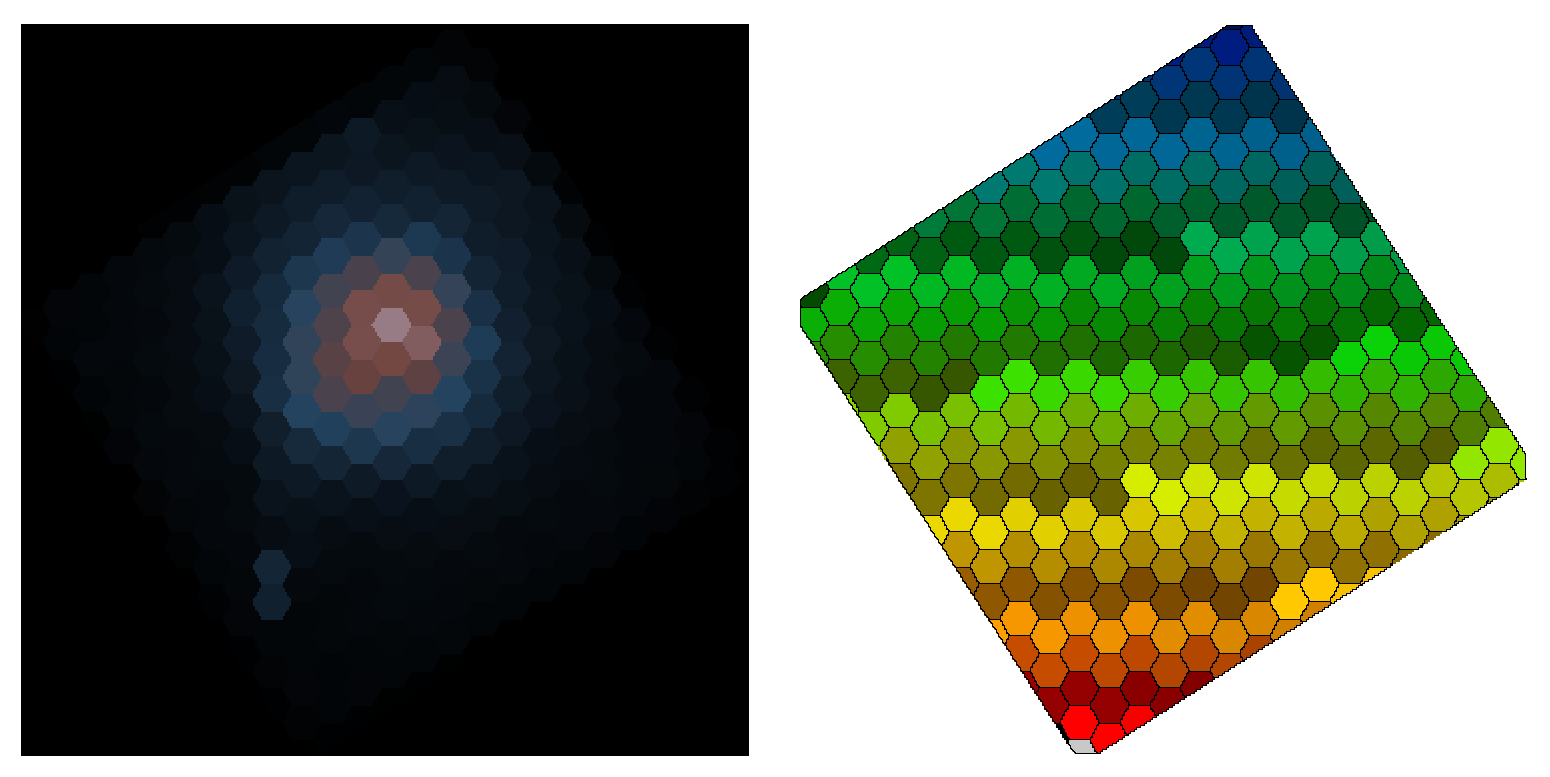

In [7]:
display_map hex.img hex.map hex.png hex.reg

> **TBD** we could also rotate the hexagons +/-90 deg 